<a href="https://colab.research.google.com/github/dr-song-summer-project/ChatBot_NLP/blob/main/CloudWord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud
!pip install konlpy
!pip install matplotlib

In [ ]:
from google.colab import files

uploaded = files.upload()

# otfPath = '/Users/junpyojang/Library/Fonts/NanumSquareOTF_acB.otf'

In [61]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt


# open으로 txt파일을 열고 read()를 이용하여 읽는다.
# text = open('test.txt').read() 

#pd data frame 읽기 질문 문장 읽기
path = '/content/newxlsx.xlsx'
df = pd.read_excel(path)

df = pd.DataFrame.to_numpy(df)

In [46]:
twitter = Twitter()
sentences_tag = []
for q, a in df:
  sentences_tag.append(twitter.pos(q))


/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [72]:
noun_adj_list = []

for x in sentences_tag:
  for word, tag in x:
    if tag in ['Noun']: 
      noun_adj_list.append(word)

# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(100) 


# print(tags)
a = dict(tags)
print(a)

{'생리': 9253, '약': 8585, '피임': 7830, '복용': 6376, '후': 4018, '관계': 2828, '임신': 2716, '정도': 2359, '요': 2264, '안': 2242, '제': 2118, '사정': 2067, '시작': 1943, '것': 1927, '콘돔': 1870, '질': 1798, '날': 1781, '때': 1761, '출혈': 1710, '이': 1545, '사': 1472, '전': 1405, '가능성': 1391, '주기': 1361, '달': 1289, '번': 1253, '기': 1203, '중': 1168, '거': 1161, '알': 1147, '지금': 1016, '효과': 1014, '그': 1004, '피': 986, '걱정': 975, '부정': 967, '일': 955, '내': 912, '수': 895, '다시': 857, '예정일': 831, '주': 829, '오늘': 825, '배란': 812, '처방': 795, '게': 788, '사후': 769, '혹시': 739, '두': 729, '건가': 727, '다음': 726, '시간': 720, '계속': 705, '여자친구': 694, '병원': 690, '저': 678, '더': 676, '뒤': 667, '좀': 646, '검사': 645, '때문': 643, '외': 641, '정': 627, '원래': 596, '경우': 591, '이번': 591, '일주일': 582, '바로': 579, '임기': 553, '첫': 547, '마지막': 546, '산부인과': 546, '처음': 543, '답변': 538, '또': 536, '질문': 524, '증상': 524, '상태': 521, '동안': 518, '혈': 513, '조금': 496, '기간': 472, '중단': 460, '생리통': 446, '생각': 442, '문제': 441, '하루': 440, '개월': 440, '부작용': 437, '양': 433, '테

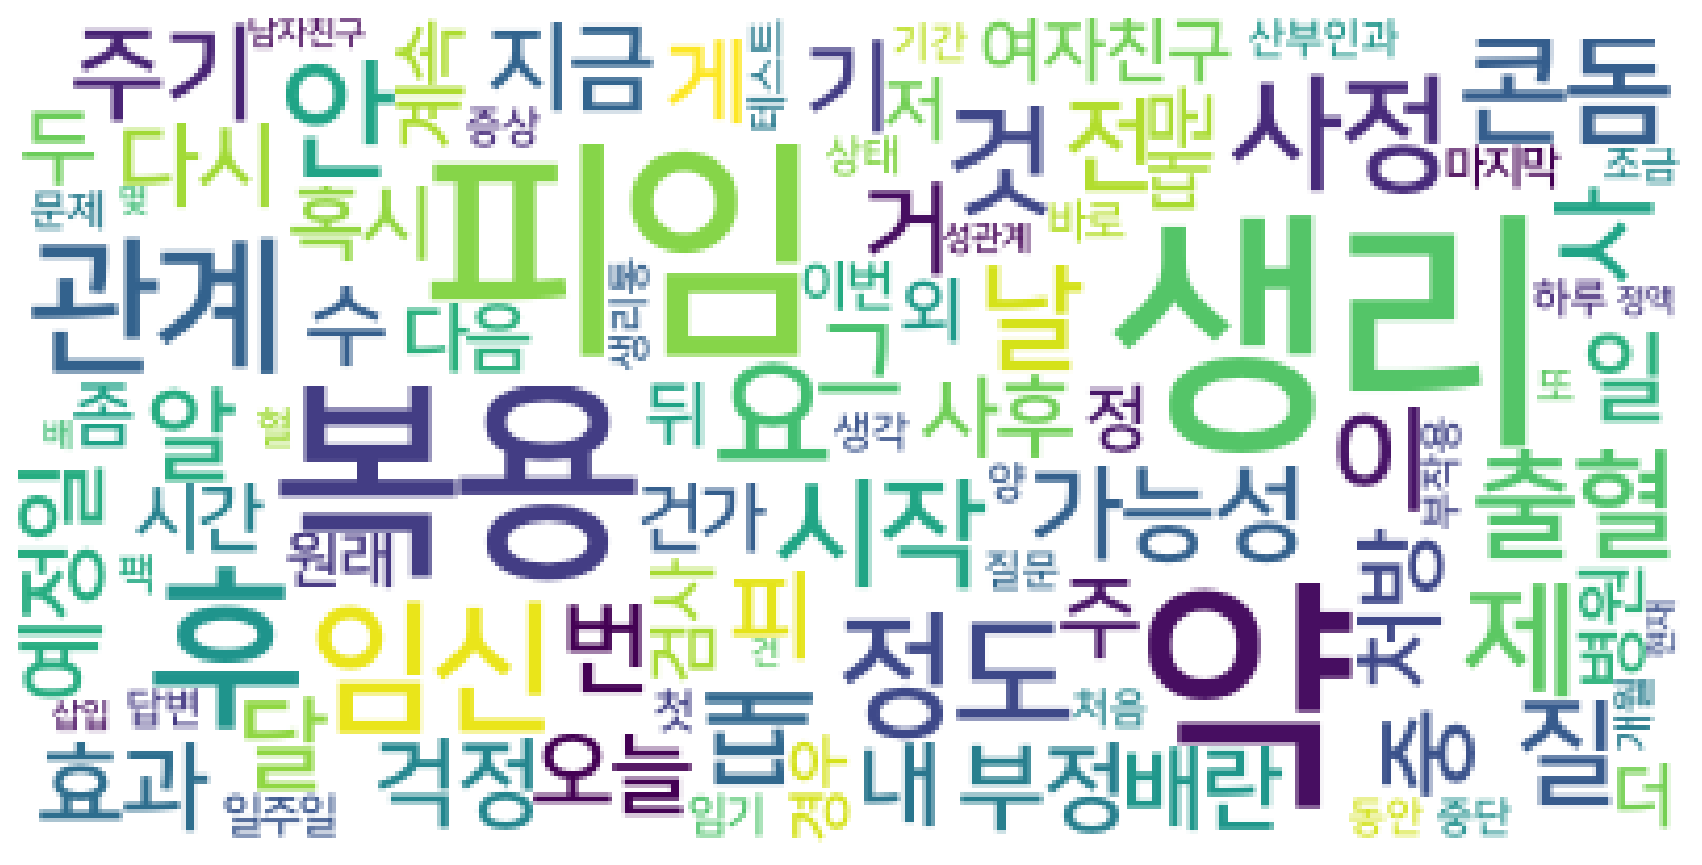

In [73]:


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
otfPath = '/content/NanumSquareOTF_acB.otf'
# wc = WordCloud(font_path=[otfPath],background_color="white", max_font_size=60)
wc = WordCloud(font_path=otfPath, background_color="white", max_font_size=60)
# print(wc)
cloud = wc.generate_from_frequencies(a)


# # 생성된 WordCloud를 test.jpg로 보낸다.
# cloud.to_file('/content/test.jpg')
plt.figure(figsize=(15, 12))
plt.axis('off')
plt.imshow(cloud)
plt.show()
